<a href="https://colab.research.google.com/github/Heisbana/AlabaOladejoAssignment02/blob/main/alaba%20Animal%20classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Install Dependencies and Setup**

In [ ]:
!pip install tensorflow opencv-python matplotlib

In [ ]:
!pip list

In [59]:
import tensorflow as tf
import os

In [60]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [61]:
tf.config.list_physical_devices('GPU')

[]

**2. Getting and modifying images**

In [62]:
import cv2
import imghdr

In [63]:
data_dir = 'data'


In [64]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [65]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Issue with image data/pigs/.ipynb_checkpoints
Issue with image data/bat/.ipynb_checkpoints


**3. Load Image Data**

In [66]:
import numpy as np
from matplotlib import pyplot as plt

In [67]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 13 files belonging to 3 classes.


In [68]:
data_iterator = data.as_numpy_iterator()

In [69]:
batch = data_iterator.next()

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

**4. Scale Data**

In [73]:
data = data.map(lambda x,y: (x/255, y))

In [ ]:
data.as_numpy_iterator().next()

**5. Split Data**

In [185]:
train_size = int(len(data)*7)
val_size = int(len(data)*2)
test_size = int(len(data)*7)

In [186]:
test_size

7

**6. Build Deep Learning Model**

In [187]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [188]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [190]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout



In [191]:
model = Sequential()

In [192]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [193]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
model.summary()

In [195]:
logdir='logs'

In [196]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [197]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
1/1 [==============================] - 2s 2s/step - loss: 0.5308 - accuracy: 0.5385
Epoch 2/20
1/1 [==============================] - 2s 2s/step - loss: -4.8430 - accuracy: 0.5385
Epoch 3/20
1/1 [==============================] - 2s 2s/step - loss: -12.7468 - accuracy: 0.5385
Epoch 4/20
1/1 [==============================] - 2s 2s/step - loss: -25.4108 - accuracy: 0.5385
Epoch 5/20
1/1 [==============================] - 2s 2s/step - loss: -43.9575 - accuracy: 0.5385
Epoch 6/20
1/1 [==============================] - 2s 2s/step - loss: -70.2546 - accuracy: 0.5385
Epoch 7/20
1/1 [==============================] - 2s 2s/step - loss: -106.4764 - accuracy: 0.5385
Epoch 8/20
1/1 [==============================] - 2s 2s/step - loss: -155.3272 - accuracy: 0.5385
Epoch 9/20
1/1 [==============================] - 2s 2s/step - loss: -220.6314 - accuracy: 0.5385
Epoch 10/20
1/1 [==============================] - 2s 2s/step - loss: -307.0703 - accuracy: 0.5385
Epoch 11/20
1/1 [===========

**8. Plot Performance**

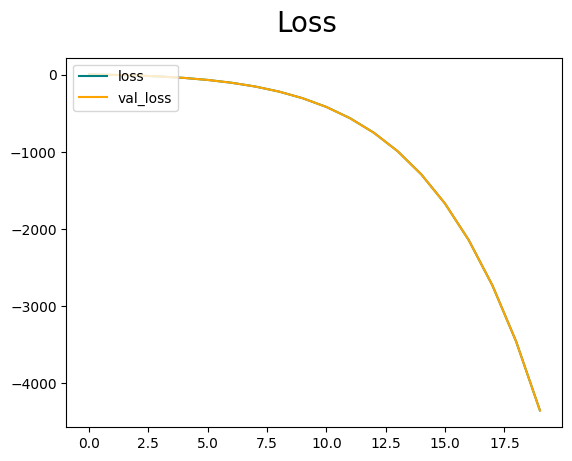

In [198]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

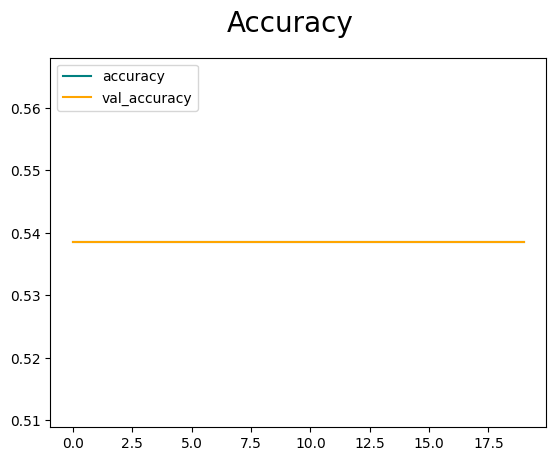

In [199]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

**9. Evaluate**

In [200]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [201]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [202]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [203]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32)


**10. Test**

In [204]:
import cv2
import matplotlib.pyplot as plt
import numpy as np


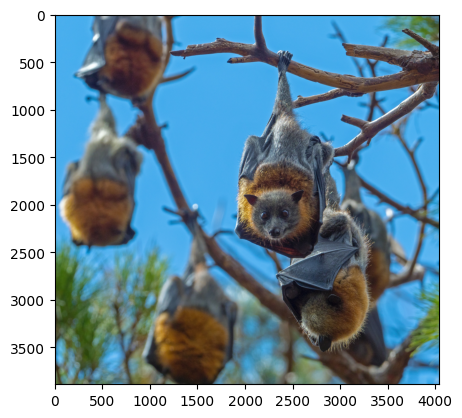

In [210]:
# Load the image
img = cv2.imread('/content/data/bat/235453.jpg')

# Check if the image was loaded successfully
if img is None:
    raise ValueError("Failed to load the image")

# Convert the image data type to np.uint8 if needed
if img.dtype != np.uint8:
    img = img.astype(np.uint8)

# Display the image using plt.imshow
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [207]:
img_testing = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 63ms/step


/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


In [214]:
img_testing

array([[1.]], dtype=float32)

In [216]:
if img_testing > 0.5:
    print(f'OOh your animal is a Bat!')
elif img_testing < 0.5:
    print(f'OOh your animal is a Pig!')
else:
  print(f'I do not know this animal')

OOh your animal is a Bat!
